# Exposing best combinations for strategy games in order to get good user rating(4.0/5.0 or above)

OBJECTIVE
   - Data preparation and cleaning
   - Identifying Genres that have high user ratings
   - Identifying the trend of user ratings based on pricing
   - Stating inferences   

# Data Cleaning and Preparation

* we shall rename all the columns that have a space (' ') in their names and replace the space with an underscore ('_')
* We shall drop the rows that have User_Rating_Count less than 7 because they cannot be considered as the count is too low for us to analyse those user ratings and also above this has to be considered because some games might have only limited users
* dropping of all the rows that do not have the Average_User_Rating or has NaN or null values will be taken care by the command for previous step
* we shall replace all the In-app_Purchases values that have null values with 0
* for the rows that have multiple In-app_Purchases values, we shall conider the sum of all those
* we shall change the data type of Original Release Date and Current Version Release Date to the Date format
* For the cleaning of the Genres column we shall do the following
    - remove the word 'Games' and 'Strategy' from all the rows as it is present in all of them
    - Do the following filtering
        - Business= Business, Finance, Simulation, News, Utilities
        - Education= Education, Books, Reference, Productivity, Trivia
        - Entertainment= Entertainment, SocialNetworking, Stickers, Emoji&Expressions, Photo&Video, Magazines&Papers
        - Lifestyle= Lifestyle, Travel, Adventure, Casino, Shopping, Music
        - Medical= Medical, Family, Health&Fitness, Food&Drink, RolePlaying
        - Sports= Sports, Racing, Action, Casual, Board, Word, Navigation
        - default= Games,Strategy
        
Filtering is done based on the first occurence of the Genres specified above, in the Genres column.

The default Genre contains the rows that were left empty after removing the words, 'Games' and 'Strategy'(i.e., didn't have a specific genre).

In [1]:
import pandas as pd
import numpy as np

In [2]:
bd=pd.read_csv('appstore_games (2).csv')

In [3]:
bd.columns=[x.replace(' ','_') for x in bd.columns]

In [4]:
bd=bd[bd['User_Rating_Count']>6]

In [5]:
temp=bd['In-app_Purchases'].fillna(value=0.0)

In [6]:
#code to add up all the multiple values of In-app_Purchases
import re
p = re.compile('[\d]+[.]+[\d]+')
#q=re.compile('[\d, ]+[\d]+')
q=re.compile('[\d]+[.]+[\d]+[,]')
for i in range(6841):
    if(temp.iloc[i]!=0.0):
        r=temp.iloc[i]
        result = re.match(q,r)
        if result:
            list=(p.findall(temp.iloc[i]))
            z=0.0
            for item in range(len(list)):
                z=z+float(list[item])
                bd.iloc[i,8]=z

In [7]:
bd['In-app_Purchases']=bd['In-app_Purchases'].fillna(value=0.0)

In [8]:
bd['In-app_Purchases']=bd['In-app_Purchases'].astype(float)

In [9]:
bd['Original_Release_Date']=pd.to_datetime(bd['Original_Release_Date'])
bd['Current_Version_Release_Date']=pd.to_datetime(bd['Current_Version_Release_Date'])

In [10]:
#pd.set_option('display.max_rows',7000)

In [11]:
tempo=bd['Genres']

In [12]:
tempo=tempo.str.replace('Games','')
tempo=tempo.str.replace('Strategy','')
tempo=tempo.str.replace(', ','')

In [13]:
import re
for i in range(len(tempo)):
    re1a=re.compile('^[B][u][s][i][n][e][s][s]').findall(tempo.iloc[i])
    re2a=re.compile('^[F][i][n][a][n][c][e]').findall(tempo.iloc[i])
    re3a=re.compile('^[S][i][m][u][l][a][t][i][o][n]').findall(tempo.iloc[i])
    re4a=re.compile('^[N][e][w][s]').findall(tempo.iloc[i])
    re5a=re.compile('^[U][t][i][l][i][t][i][e][s]').findall(tempo.iloc[i])
    
    re1b=re.compile('^[E][d][u][c][a][t][i][o][n]').findall(tempo.iloc[i])
    re2b=re.compile('^[B][o][o][k][s]').findall(tempo.iloc[i])
    re3b=re.compile('^[R][e][f][e][r][e][n][c][e]').findall(tempo.iloc[i])
    re4b=re.compile('^[P][r][o][d][u][c][t][i][v][i][t][y]').findall(tempo.iloc[i])
    re5b=re.compile('^[T][r][i][v][i][a]').findall(tempo.iloc[i])
    
    re1c=re.compile('^[E][n][t][e][r][t][a][i][n][m][e][n][t]').findall(tempo.iloc[i])
    re2c=re.compile('^[S][o][c][i][a][l]').findall(tempo.iloc[i])
    re3c=re.compile('^[S][t][i][c][k][e][r][s]').findall(tempo.iloc[i])
    re4c=re.compile('^[E][m][o][j][i]').findall(tempo.iloc[i])
    re5c=re.compile('^[P][h][o][t][o]').findall(tempo.iloc[i])
    re6c=re.compile('^[M][a][g][a][z][i][n][e]').findall(tempo.iloc[i])
    
    re1d=re.compile('^[L][i][f][e][s][t][y][l][e]').findall(tempo.iloc[i])
    re2d=re.compile('^[T][r][a][v][e][l]').findall(tempo.iloc[i])
    re3d=re.compile('^[A][d][v][e][n][t][u][r][e]').findall(tempo.iloc[i])
    re4d=re.compile('^[C][a][s][i][n][o]').findall(tempo.iloc[i])
    re5d=re.compile('^[S][h][o][p][p][i][n][g]').findall(tempo.iloc[i])
    re6d=re.compile('^[M][u][s][i][c]').findall(tempo.iloc[i])
    
    re1e=re.compile('^[M][e][d][i][c][a][l]').findall(tempo.iloc[i])
    re2e=re.compile('^[F][a][m][i][l][y]').findall(tempo.iloc[i])
    re3e=re.compile('^[H][e][a][l][t][h]').findall(tempo.iloc[i])
    re4e=re.compile('^[F][o][o][d]').findall(tempo.iloc[i])
    re5e=re.compile('^[R][o][l][e]').findall(tempo.iloc[i])
    
    re1f=re.compile('^[S][p][o][r][t][s]').findall(tempo.iloc[i])
    re2f=re.compile('^[R][a][c][i][n][g]').findall(tempo.iloc[i])
    re3f=re.compile('^[A][c][t][i][o][n]').findall(tempo.iloc[i])
    re4f=re.compile('^[C][a][s][u][a][l]').findall(tempo.iloc[i])
    re5f=re.compile('^[G][a][m][i][n][g]').findall(tempo.iloc[i])
    
    re1g=re.compile('^[P][u][z][z][l][e]').findall(tempo.iloc[i])
    re2g=re.compile('^[C][a][r][d]').findall(tempo.iloc[i])
    re3g=re.compile('^[B][o][a][r][d]').findall(tempo.iloc[i])
    re4g=re.compile('^[W][o][r][d]').findall(tempo.iloc[i])
    re5g=re.compile('^[N][a][v][i][g][a][t][i][o][n]').findall(tempo.iloc[i])
    if(re1a or re2a or re3a or re4a or re5a):
        tempo.iloc[i]='Business'
    if(re1b or re2b or re3b or re4b or re5b):
        tempo.iloc[i]='Education'
    if(re1c or re2c or re3c or re4c or re5c or re6c):
        tempo.iloc[i]='Entertainment'    
    if(re1d or re2d or re3d or re4d or re5d or re6d):
        tempo.iloc[i]='Lifestyle'
    if(re1e or re2e or re3e or re4e or re5e):
        tempo.iloc[i]='Medical'
    if(re1f or re2f or re3f or re4f or re5f):
        tempo.iloc[i]='Sports'
    if(re1g or re2g or re3g or re4g or re5g):
        tempo.iloc[i]='Puzzle'    

In [14]:
tempo[tempo=='']='default'

In [15]:
tempo.unique()

array(['Puzzle', 'Entertainment', 'Sports', 'Business', 'Medical',
       'default', 'Lifestyle', 'Education'], dtype=object)

In [16]:
bd['Genres']=tempo

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

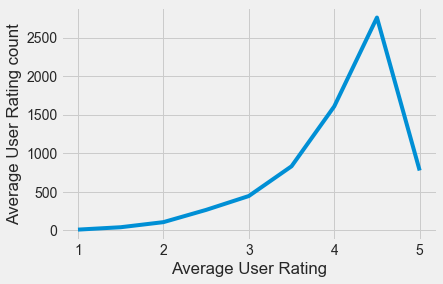

In [36]:
count=[4. , 3.5, 3. , 2.5, 2. , 4.5, 1.5, 5. , 1. ]
count.sort()
j=0
cs=[0,0,0,0,0,0,0,0,0]
for i in count:
    cs[j]=bd[bd['Average_User_Rating']==i].count().iloc[0]
    j=j+1
cs    
plt.plot(count,cs)
plt.xlabel('Average User Rating')
plt.ylabel('Average User Rating count')
plt.show()

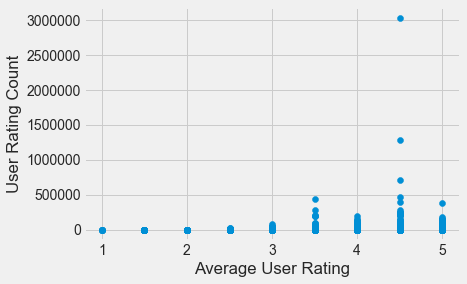

In [37]:
plt.scatter(bd['Average_User_Rating'],bd['User_Rating_Count'])
plt.xlabel('Average User Rating')
plt.ylabel('User Rating Count')
plt.show()

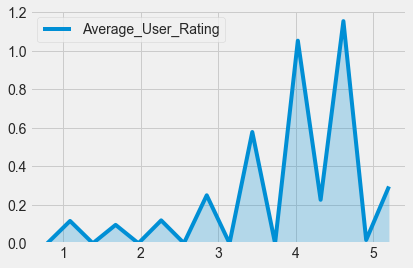

In [38]:
sns.kdeplot(bd['Average_User_Rating'],shade=True,gridsize=10)

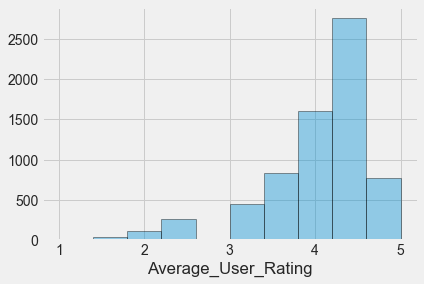

In [39]:
sns.distplot(bd['Average_User_Rating'],kde=False,hist=True,bins=10,hist_kws=dict(edgecolor="k", linewidth=1))

In [40]:
w=bd[bd['Average_User_Rating']>=4]

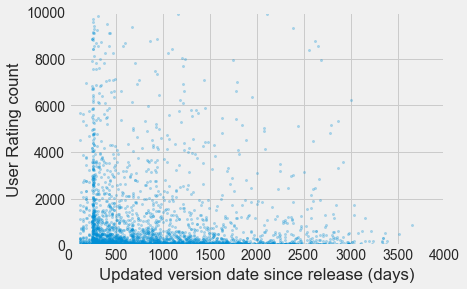

In [41]:
today=pd.to_datetime('2020-04-09')
w['gapdays']=today-w['Current_Version_Release_Date']
w['gapdays']=w['gapdays'].astype(str)
w['gapdays']=w['gapdays'].str.replace(' days 00:00:00.000000000','')
w['gapdays']=w['gapdays'].astype(int)
plt.scatter(w.gapdays, w.User_Rating_Count, alpha=0.3, s=5) 

plt.xlim(0, 4000)
plt.ylim(0, 10000)

plt.xlabel('Updated version date since release (days)')
plt.ylabel('User Rating count')
plt.show()

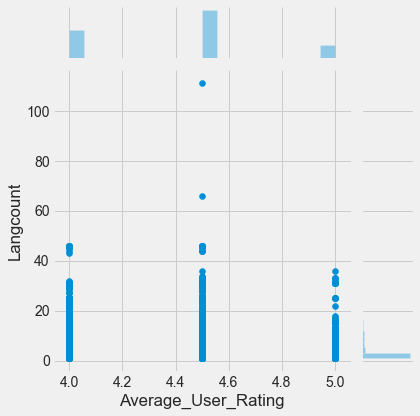

In [42]:
te=w['Languages']
te=te.astype(str)
su=0
pat=re.compile('[.]*[,]')
for i in range(len(te)):
    res=re.findall(pat,te.iloc[i])
    if(res):
        te.iloc[i]=(res.count(','))+1
    else:
        te.iloc[i]=1
bd['Langcount']=te        
sns.jointplot(x="Average_User_Rating", y="Langcount", data=bd)

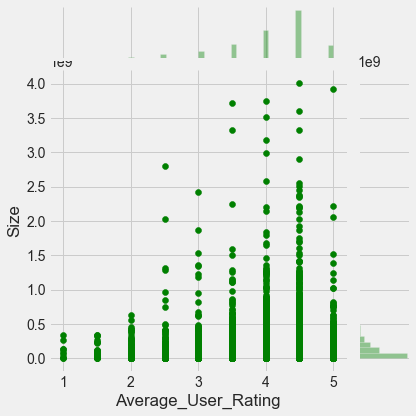

In [43]:
sns.jointplot(x="Average_User_Rating", y="Size", data=bd,color="g")

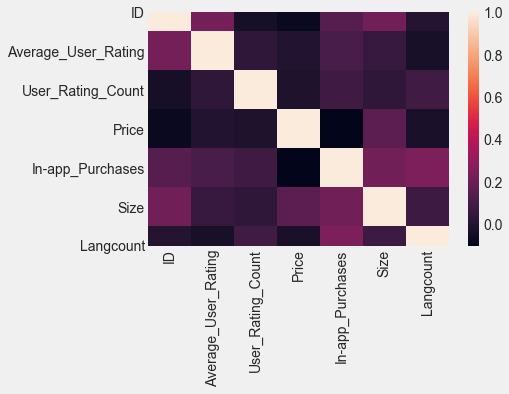

In [44]:
sns.heatmap(bd.corr())

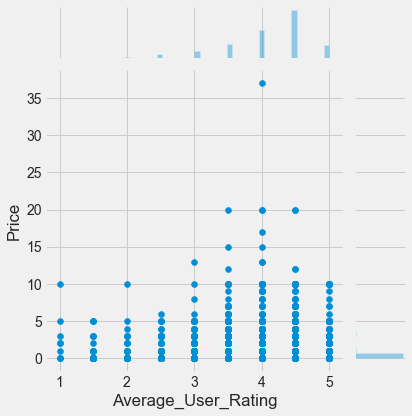

In [45]:
sns.jointplot(x="Average_User_Rating", y="Price", data=bd.loc[(bd['Price']<40)])

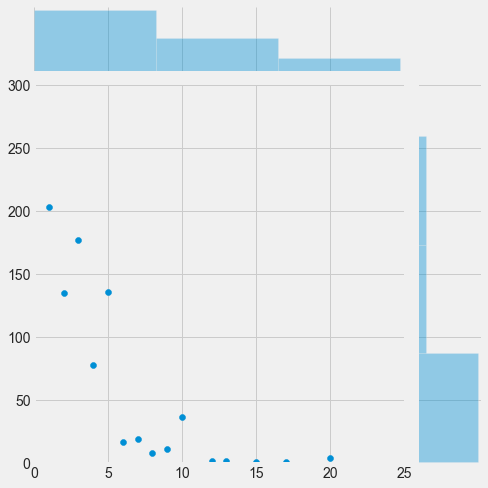

In [46]:
w['Price']=w['Price'].astype(float)
pr=[  2.99,   0.99,   5.99,   7.99,   1.99,   4.99,   0.  ,   3.99,
         9.99,  19.99,   6.99,  11.99,   8.99, 139.99,  12.99,  14.99,
        16.99,  36.99,  59.99]
pr.sort()
y=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
j=0
for i in pr:
    y[j]=w[w['Price']==i].count().iloc[0]
    j=j+1  
sns.jointplot(x=pr, y=y,xlim=(0,25),ylim=(0,300),height=7)

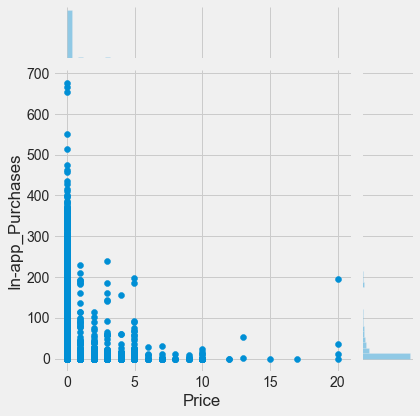

In [47]:
sns.jointplot(x="Price", y="In-app_Purchases", data=bd.loc[(bd['Price']<50)&(bd['Average_User_Rating']>=4)&(bd['Price']<25)])
#yes

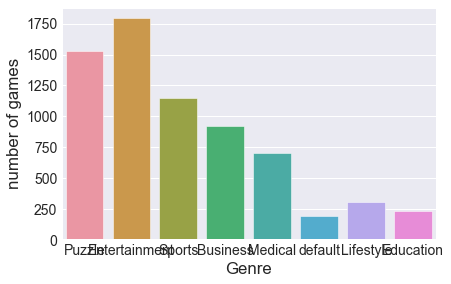

In [48]:
sns.set_style('darkgrid')
x=['Puzzle', 'Entertainment', 'Sports', 'Business', 'Medical',
       'default', 'Lifestyle', 'Education']
y=[bd.Genres[(bd['Genres']=='Puzzle')].count(),bd.Genres[(bd['Genres']=='Entertainment')].count(),\
  bd.Genres[(bd['Genres']=='Sports')].count(),bd.Genres[(bd['Genres']=='Business')].count(),\
   bd.Genres[(bd['Genres']=='Medical')].count(),bd.Genres[(bd['Genres']=='default')].count(),\
  bd.Genres[(bd['Genres']=='Lifestyle')].count(),bd.Genres[(bd['Genres']=='Education')].count()]
vis1=sns.barplot(x,y)
vis1.set(xlabel='Genre',ylabel='number of games')

plt.show()
plt.ioff()

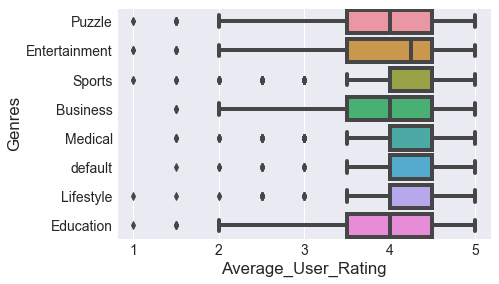

In [49]:
sns.boxplot(x='Average_User_Rating',y='Genres',data=bd)

([<matplotlib.patches.Wedge at 0x1a1d72a810>,
 [Text(-1.6826720690109036, 1.5679970370413856, 'Entertainment'),
  Text(-1.6730665561232723, -1.5782421546713967, 'Puzzle'),
  Text(0.9598074202022073, -2.090160213027887, 'Sports'),
  Text(2.2639105465316196, -0.40584361187888957, 'Business'),
  Text(1.9521214368424922, 1.2162326651673205, 'Medical'),
  Text(1.1724268375392435, 1.9787408396800545, 'Lifestyle'),
  Text(0.6496997679689899, 2.2063295790749486, 'Education'),
  Text(0.21316327019979564, 2.290100744560756, 'Default')],
 [Text(-1.2802939655517744, 1.193041223835837, '26.1%'),
  Text(-1.2729854231372726, -1.2008364220325847, '21.8%'),
  Text(0.7302882545016796, -1.5903392925212185, '17.8%'),
  Text(1.7225406332305804, -0.3087940525165464, '12.8%'),
  Text(1.4853097889018962, 0.9253944191490484, '10.5%'),
  Text(0.8920638981276853, 1.505563682365259, '4.7%'),
  Text(0.4943367799764054, 1.6787290275570261, '3.2%'),
  Text(0.16218944471723581, 1.7424679578179667, '3.0%')])

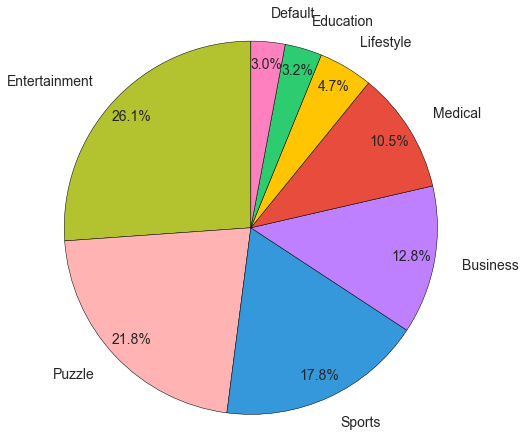

In [50]:
colors=['#b3c330',"#ffb3b3", "#3498db", "#bf80ff", "#e74c3c", "#ffc500", "#2ecc71",'#ff80bf']
labels=[ 'Entertainment','Puzzle', 'Sports', 'Business', 'Medical' ,'Lifestyle', 'Education', 'Default']
series=[w[w['Genres']=='Entertainment'].count().iloc[0],w[w['Genres']=='Puzzle'].count().iloc[0],w[w['Genres']=='Sports'].count().iloc[0],w[w['Genres']=='Business'].count().iloc[0],w[w['Genres']=='Medical'].count().iloc[0],w[w['Genres']=='Lifestyle'].count().iloc[0],w[w['Genres']=='Education'].count().iloc[0],w[w['Genres']=='default'].count().iloc[0]]
plt.pie(series,colors=colors,labels=labels,autopct='%1.1f%%',radius=2,wedgeprops={'edgecolor':'black'},startangle=90,pctdistance=0.875,labeldistance=1.15)

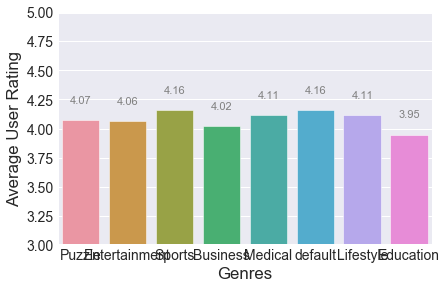

In [51]:
x=['Puzzle', 'Entertainment', 'Sports', 'Business', 'Medical',
       'default', 'Lifestyle', 'Education']
y=[bd.Average_User_Rating[(bd['Genres']=='Puzzle')].mean(),\
   bd.Average_User_Rating[(bd['Genres']=='Entertainment')].mean(),\
   bd.Average_User_Rating[(bd['Genres']=='Sports')].mean(),\
   bd.Average_User_Rating[(bd['Genres']=='Business')].mean(),\
   bd.Average_User_Rating[(bd['Genres']=='Medical')].mean(),\
   bd.Average_User_Rating[(bd['Genres']=='default')].mean(),\
   bd.Average_User_Rating[(bd['Genres']=='Lifestyle')].mean(),\
   bd.Average_User_Rating[(bd['Genres']=='Education')].mean()]

vis1=sns.barplot(x,y)
vis1.set(xlabel='Genres',ylabel='Average User Rating')
vis1.set(ylim=(3,5))


for p in vis1.patches:
    vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() /2.,p.get_height()), 
    ha='center', va='center', fontsize=11, color='gray',xytext=(0,20),
    textcoords='offset points')

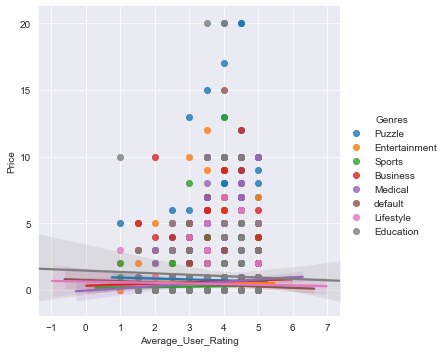

In [34]:
sns.set_style('darkgrid')
sns.lmplot('Average_User_Rating', 'Price', 
           data=bd.loc[(bd['Price']<25)],hue='Genres')

# Inferences

* We can see that as the Average User Rating increases, the count of games also increases and decreases for the Average User Rating of 5. It means that there are more games having a good User Rating.
* We see that most number of Users have voted for 4.5 User Rating.
* We also see that the number of games having Average User Rating of 5 is slightly less than the games having Average User Rating of 3.5. So most of the games having a good User Rating have 4 or 4.5.

* When we consider the languages count of each game against it's Average User Rating, we see that there is no relation between the two. So we can infer that the number of languages does not contribute in a good User Rating.
* We can see that the Games that are updated more recently to the current date, have a larger range of participants as the user Rating Count is more for those.So, it would be helpful for getting good User Rating if the games are updated frequently.
* We can see that the Size increases significantly as the graph moves towards the good User Rating. So, one could consider a game with higher Size to gain a good User Rating.

Thses are some general assumptions done based on different factors.


* We see that the Average User Rating has some co-relation with the Price.
* We can see that with the increase of Average User Rating, the price also slightly increases. So, to gain a good User Rating, one could go for a higher price game.
* But when we consider the total count of games that have a good User Rating, we can see that the games with price as low as 0.0 has the highest count of good User Rating and as the Price increases,the count of games with good User Rating decreases.
* Further we see that for the games that have a good Average User Rating(4.0/5.0 or greater)  as the Price increases, the In-app Purchases decreases and vice-versa. Thus to gain a good User Rating, one must keep the Price high and In-app purchases low or keep the Price low and the In-app Purchases high.

These are the Price related inferences done to ensure a good User Rating.


* We see that the Genres default, Lifestyle and Education have very less games which means that they have less competitions or that such types of games are not so highly available in the market. Adopting one of these Genres would include a risk of low participants but would be great for the ones that are willing to take that risk.
* Also the Genres Entertainment and Puzzle have a large number of games which means there is a large number of competitiors in the Genres but also that it has high demand. One could choose this Genre if he/she is well-versed in the field.
* Now, according to the User rating, the Genres Entertainment and Puzzle are the ones that have maximum number of good User Ratings. So, one could go for one of these for having a greater probability of getting good User Ratings.
* On the other hand, default, Education and Lifestyle Genres have very low count of good User Ratings.So, it would be better to avoid these Genres if one wants a high probability of getting a good user rating.
* We can also see that the Genres Lifestyle, default, Medical and Sports have all of their games with Average User Ratings above or equal to 4.0 which is a good User rating. These Genres can be considered by the ones that are going to try out many or all games of a specific Genre and want all their games to have a good User Rating, rather than some having very high User Ratings and some having low User Ratings.
* The Genres Sports and default have a slightly high mean of Average User Rating and thus could be considered as an average and Education has slightly less mean than the others and so can be avoided.

These are the different perspectives of inferencing the Genres for getting good User Ratings.

To conclude our analysis a wide spectrum of visualization is provided considering all the important variables i.e., Average User Rating, Price and individual Genres.
